In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import nibabel as nib
from numpy import savetxt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nilearn import plotting, image
from nilearn.plotting import plot_img
import matplotlib.gridspec as gridspec

In [2]:
# Save models for glover 

analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'

for dataset in range(11, 20):
    ID = "0"+str(2000+dataset)
    matrix = pd.read_csv(analysis_folder+'/first_level/glover/matrix/matrix_sub-{}00_ses-1.csv'.format(ID))
    matrix_model = matrix.iloc[:, 0]
    savetxt(analysis_folder+'first_level/glover/model/model_sub-{}00_ses-1.csv'.format(ID), matrix_model, delimiter=',')

In [3]:
# Init var

hrf_path = 'glover'
    # glover
    # spm
    # rat_hrf_gamma_diff
    # rat_hrf_delay_disp
    
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
model_path = analysis_folder+'first_level/{}/model/'.format(hrf_path)
matrix_path = analysis_folder+'first_level/{}/matrix/'.format(hrf_path)
z_scores_path = analysis_folder+'second_level/{}/z_score/'.format(hrf_path)
second_level_path = analysis_folder+'second_level/{}/image/'.format(hrf_path)
first_level_path = analysis_folder+'first_level/'
mask_ROIs_path = analysis_folder+'first_level/{}/mask_ROIs/'.format(hrf_path)

template_path = '/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template_Masked.nii'

                                                                                                                                                                                                                                        

In [40]:
# Init variables
ID = "0"+str(2002)
subj_num = 200200
matrix = pd.read_csv(matrix_path+'matrix_sub-0{}_ses-1.csv'.format(subj_num))
map = mpimg.imread(second_level_path+'stat_map_dataset-{}_z_score.png'.format(ID))
z_scores = nib.load(z_scores_path+'z_score_dataset-{}.nii.gz'.format(ID))  
 
residuals_csv = pd.read_csv(mask_ROIs_path+'residuals/residuals_sub-0{}_ses-1.csv'.format(subj_num))
residuals_csv = ((residuals_csv - np.mean(residuals_csv)) / np.std(residuals_csv))
mean_residuals = residuals_csv.mean(axis=1)

glover_hrf_model = pd.read_csv(first_level_path+'glover/matrix/matrix_sub-0{}_ses-1.csv'.format(subj_num))
glover_hrf_model = glover_hrf_model.iloc[:, 0] 

template =nib.load(template_path)

/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


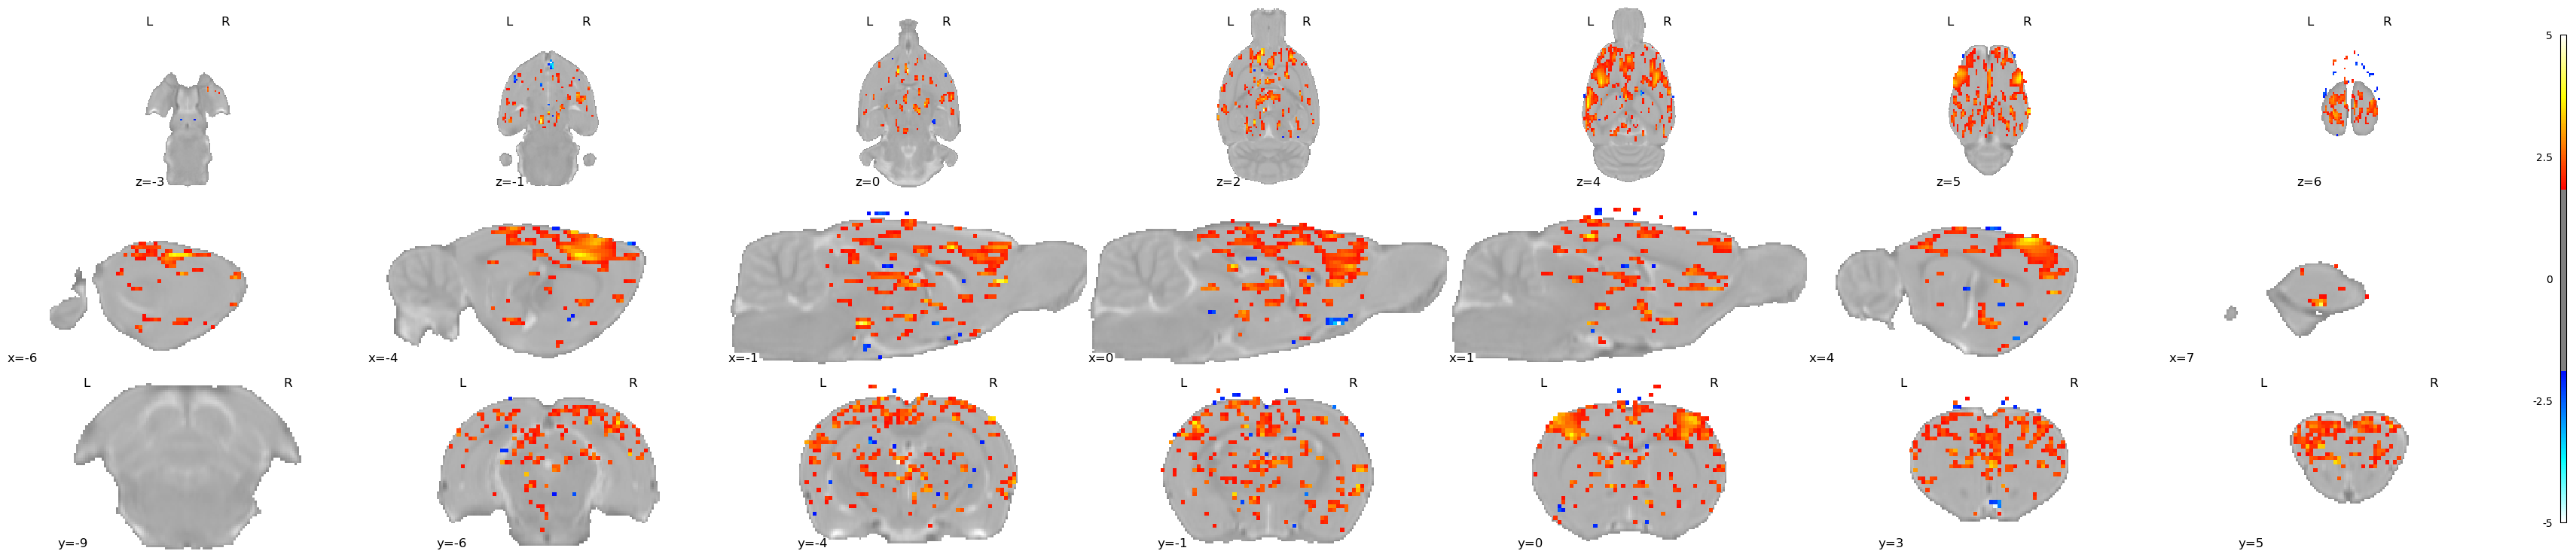

In [156]:

plot_stat = plotting.plot_stat_map(z_scores,
                                   bg_img=template,
                                   #cut_coords = 15,
                                   #cut_coords = (0 ,0, 5.5),
                                   threshold=1.9,
                                   display_mode='mosaic',
                                   cbar_tick_format='%.2g',
                                   symmetric_cbar=True,
                                   draw_cross=True,
                                   vmax=5,
                                   black_bg=False) 

plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/glover_map-model_dataset-{}.svg'.format(ID), format='svg', dpi=1200) 


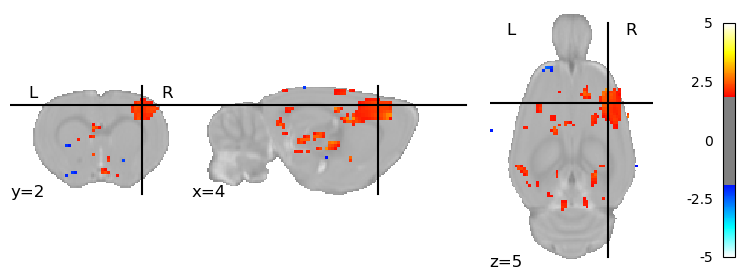

In [175]:
template =nib.load(template_path)

for ID in range(2007, 2008):

    subj_num = "0"+str(ID)
    z_scores = nib.load(z_scores_path+'z_score_dataset-{}.nii.gz'.format(subj_num))  

    plot_stat = plotting.plot_stat_map(z_scores,
                                       bg_img=template,
                                       cut_coords=(4, 2, 5),
                                       threshold=1.9,
                                       display_mode='ortho',
                                       cbar_tick_format='%.2g',
                                       symmetric_cbar=True,
                                       draw_cross=True,
                                       vmax=5,
                                       black_bg=False)

    #plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/glover_map-model_dataset-{}.svg'.format(ID), format='svg', dpi=1200)



/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


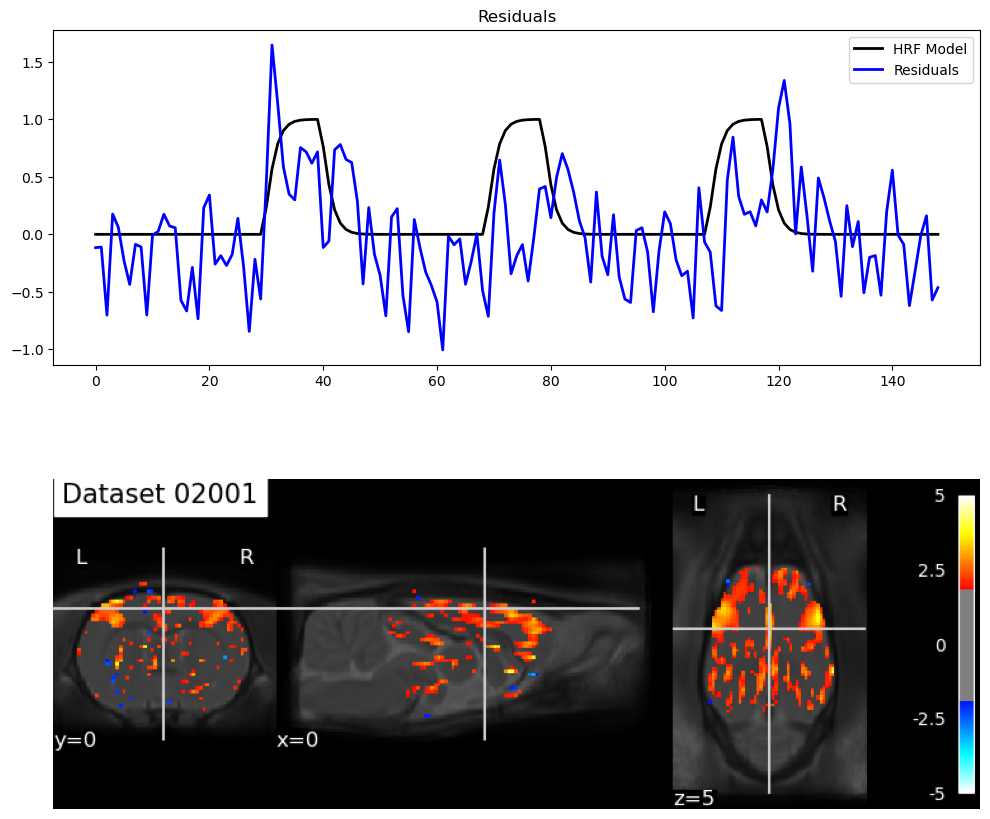

In [55]:
# Loop over the dataset IDs
for dataset in range(1, 2):
    ID = "0"+str(2000+dataset)
    matrix = pd.read_csv(matrix_path+'matrix_sub-{}00_ses-1.csv'.format(ID))
    map = mpimg.imread(second_level_path+'stat_map_dataset-{}_z_score.png'.format(ID))
    residuals_csv = pd.read_csv(mask_ROIs_path+'residuals/residuals_sub-{}00_ses-1.csv'.format(ID))
    residuals_csv = ((residuals_csv - np.mean(residuals_csv)) / np.std(residuals_csv))
    mean_residuals = residuals_csv.mean(axis=1)

    glover_hrf_model = pd.read_csv(first_level_path + 'rat_hrf_delay_disp/matrix/matrix_sub-{}00_ses-1.csv'.format(ID))
    glover_hrf_model = glover_hrf_model.iloc[:, 0]

    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

    # Plotting Residuals
    ax1 = plt.subplot(gs[0])
    ax1.plot(glover_hrf_model, color='k', linewidth=2, label='HRF Model')
    ax1.plot(mean_residuals, color='b', linewidth=2, label='Residuals')
    ax1.legend()
    ax1.set_title('Residuals')

    # Plotting Stat Map
    ax2 = fig.add_subplot(gs[1])
    ax2.imshow(map)
    ax2.set_axis_off()

    plt.tight_layout()

Processing dataset:  02001


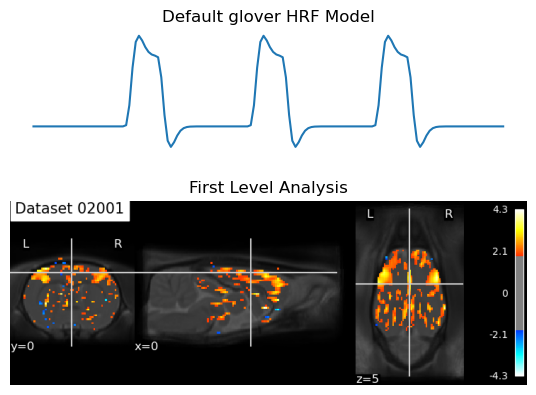

In [5]:
# Compare default HRF

for dataset in range(1, 2):
    
    fig = plt.figure(figsize=(20, 5))
    gs = fig.add_gridspec(nrows=2, ncols=2, hspace=0.1, wspace=1.0, height_ratios=[1, 2], width_ratios=[1, 1])  #hspace (height space) and wspace (width space)

    ID = "0"+str(2000+dataset)
    print('Processing dataset: ', ID)
    model = pd.read_csv(model_path+'model_sub-{}00_ses-1.csv'.format(ID))
    map = mpimg.imread(second_level_path+'stat_map_dataset-{}_z_score.png'.format(ID))
        
    # Create Three Axes Objects
    ax1 = fig.add_subplot(gs[0, axes)
    ax1.plot(model)
    ax1.set_ylabel('HRF amplitude')
    ax1.set_xlabel('Time (s)')
    ax1.set_title('Default glover HRF Model')
    ax1.set_axis_off()

    ax3 = fig.add_subplot(gs[1, axes)
    ax3.imshow(map)
    ax3.set_title('First Level Analysis')
    ax3.set_axis_off()
    
    #plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/glover_model_map_dataset-{}.svg'.format(ID), format='svg', dpi=1200) 
    plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/glover_model_map_dataset-{}.svg'.format(ID), format='svg', dpi=1200) 


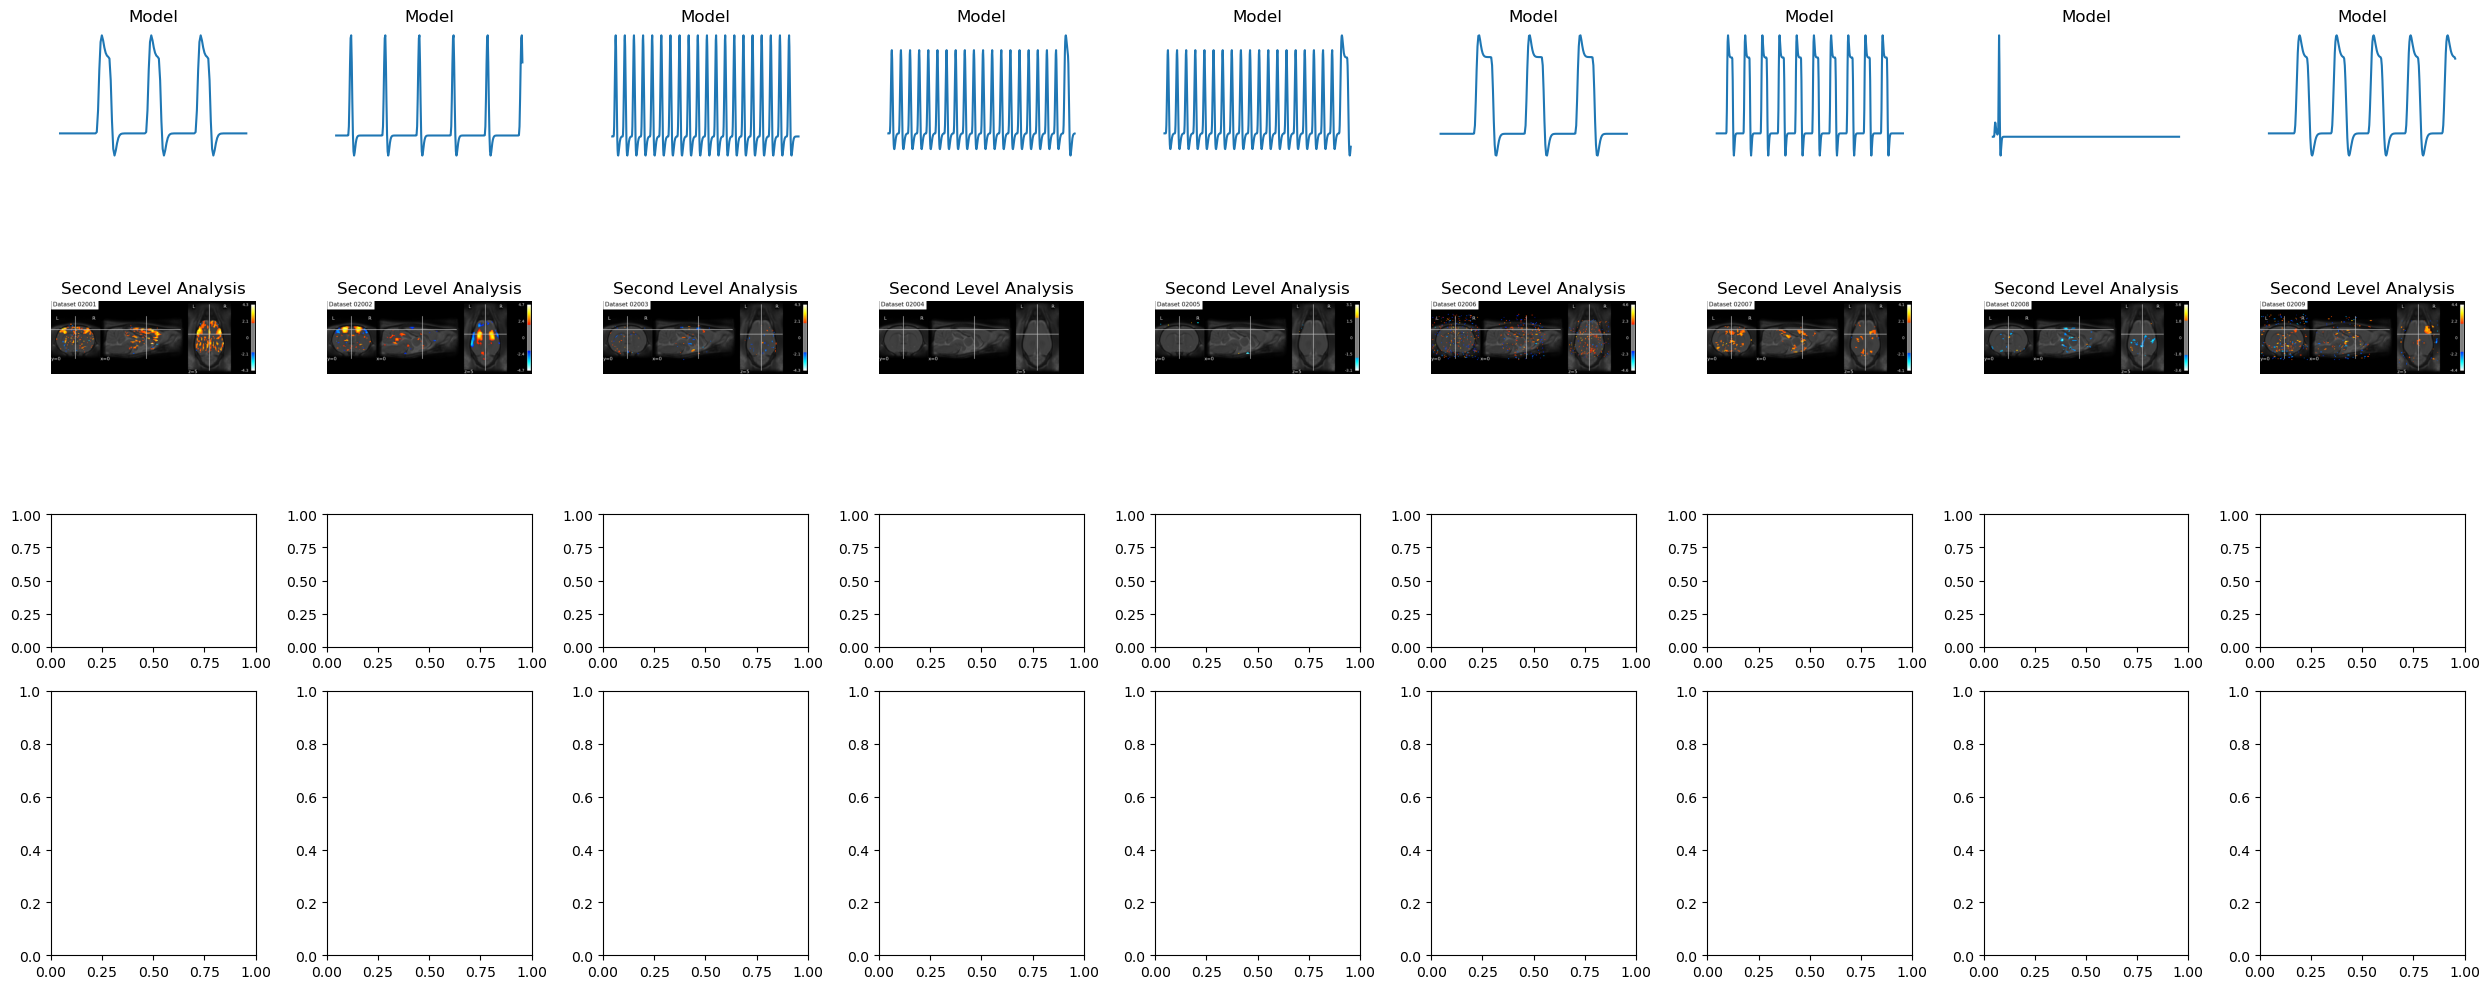

In [85]:
fig, axs = plt.subplots(nrows=4, ncols=9, figsize=(25, 10), height_ratios=[1, 2, 1, 2])

for dataset in range(1, 10):
    ID = "0" + str(2000 + dataset)
    model = pd.read_csv(model_path + 'model_sub-{}00_ses-1.csv'.format(ID))
    map = mpimg.imread(second_level_path + 'stat_map_dataset-{}_z_score.png'.format(ID))

    # Plot the model in the corresponding subplot
    ax_model = axs[0, dataset-1]
    ax_model.plot(model)
    ax_model.set_ylabel('HRF amplitude')
    ax_model.set_xlabel('Time (s)')
    ax_model.set_title('Model')
    ax_model.set_axis_off()

    # Plot the map in the corresponding subplot
    ax_map = axs[1, dataset-1]
    ax_map.imshow(map)
    ax_map.set_title('Second Level Analysis')
    ax_map.set_axis_off()


plt.tight_layout()
plt.show()